# Loading Data

### Install Packages

Install Python libraries using pip:
- `pandas`: For data manipulation and analysis.
- `scikit-learn`: For machine learning and data mining.
- `matplotlib`: For creating static, animated, and interactive visualizations.
- `seaborn`: For statistical data visualization based on matplotlib.
- `statsmodels`: For estimating statistical models and performing statistical tests.
- `keras`: A high-level neural networks API.
- `tensorflow`: An open-source platform for machine learning.
- `scikeras[tensorflow]`: A wrapper to use Keras models in scikit-learn with TensorFlow as the backend.

In [1]:
# Install packages
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn
! pip install statsmodels
! pip install keras
! pip install tensorflow
! pip install scikeras[tensorflow]

### Import Packages

Importing Python libraries and modules for data analysis, machine learning, and data visualization:
- `pandas`: For data manipulation and analysis.
- `LabelEncoder` from `sklearn.preprocessing`: To normalize labels.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations.
- `seaborn`: For statistical data visualization.
- `numpy`: For support of large, multi-dimensional arrays and matrices.
- `StandardScaler` from `sklearn.preprocessing`: To standardize features by removing the mean and scaling to unit variance.
- `train_test_split` from `sklearn.model_selection`: To split the dataset into random train and test subsets.
- `RandomForestRegressor` from `sklearn.ensemble`: A meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset.
- `ARIMA` from `statsmodels.tsa.arima.model`: A model used for time series analysis.
- `Sequential` from `keras.models`: To create a neural network.
- `Dense` from `keras.layers`: The regular deeply connected neural network layer.
- `KerasRegressor` from `keras.wrappers.scikit_learn`: A wrapper for using the Keras library as part of a scikit-learn workflow.
- `mean_squared_error, mean_absolute_error, r2_score` from `sklearn.metrics`: Metrics to evaluate the model performance.
- `sqrt` from `math`: To calculate the square root.

In [2]:
# Import packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

### Reading Data

This cell reads multiple CSV files into pandas dataframes. The following files are read:
- "holidays_events.csv"
- "items.csv"
- "oil.csv"
- "stores.csv"
- "train.csv"
- "transactions.csv"
- "family.csv"

The features are split among the above files. The "train.csv" file contains the main training data. Joining the other files will give the full features for the dataset.

In [3]:
# Read data
df_holidays_events = pd.read_csv("holidays_events.csv")  # date,type,locale,locale_name,description,transferred
df_items = pd.read_csv("items.csv")  # item_nbr,family,class,perishable
df_oil = pd.read_csv("oil.csv")  # date,dcoilwtico
df_stores = pd.read_csv("stores.csv")  # store_nbr,city,state,type,cluster
df_train = pd.read_csv("train.csv", dtype={"onpromotion": "object"}, skiprows=lambda l: l % 250 != 0)  # id,date,store_nbr,item_nbr,unit_sales,onpromotion
df_transactions = pd.read_csv("transactions.csv")  # date,store_nbr,transactions
df_family = pd.read_csv("family.csv")  # family,family_subway

# Preparing Data

### Merging Data

Merges multiple dataframes (`df_train`, `df_items`, `df_family`, `df_transactions`, `df_stores`, `df_oil`, `df_holidays_events`) into a single dataframe (`df`) based on common keys. The merging is done using left joins.

In [4]:
# Merge dataframes
df_items = pd.merge(df_items, df_family, on="family", how="left")
df_items.drop(columns=["family"], inplace=True)
df_items.rename(columns={"family_subway": "family"}, inplace=True)
df = pd.merge(df_train, df_items, on="item_nbr", how="left")
df = pd.merge(df, df_transactions, on=["date", "store_nbr"], how="left")
df = pd.merge(df, df_stores, on="store_nbr", how="left")
df.rename(columns={"type": "store_type"}, inplace=True)
df = pd.merge(df, df_oil, on="date", how="left")
df = pd.merge(df, df_holidays_events, on="date", how="left")
df.rename(columns={"type": "holidays_events_type"}, inplace=True)

# Get the general information and statistical details
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    511881 non-null  int64  
 1   date                  511881 non-null  object 
 2   store_nbr             511881 non-null  int64  
 3   item_nbr              511881 non-null  int64  
 4   unit_sales            511881 non-null  float64
 5   onpromotion           424329 non-null  object 
 6   class                 511881 non-null  int64  
 7   perishable            511881 non-null  int64  
 8   family                511881 non-null  object 
 9   transactions          511022 non-null  float64
 10  city                  511881 non-null  object 
 11  state                 511881 non-null  object 
 12  store_type            511881 non-null  object 
 13  cluster               511881 non-null  int64  
 14  dcoilwtico            344061 non-null  float64
 15  

,id,store_nbr,item_nbr,unit_sales,class,perishable,transactions,cluster,dcoilwtico
count,5.118810e+05,511881.000000,5.118810e+05,511881.000000,511881.000000,511881.000000,511022.000000,511881.000000,344061.000000
mean,6.291564e+07,27.466554,9.740833e+05,8.564342,1963.665444,0.252867,1884.906990,8.726688,61.426248
std,3.620356e+07,16.329811,5.208898e+05,19.339808,1151.915933,0.434656,1042.955799,4.626000,23.774528
min,2.490000e+02,1.000000,9.699500e+04,-55.000000,1002.000000,0.000000,5.000000,1.000000,26.190000
25%,3.154600e+07,12.000000,5.229410e+05,2.000000,1050.000000,0.000000,1157.000000,4.000000,45.370000
50%,6.315325e+07,28.000000,9.626000e+05,4.000000,1190.000000,0.000000,1554.000000,9.000000,50.120000
75%,9.415050e+07,43.000000,1.354383e+06,9.000000,2712.000000,1.000000,2390.000000,13.000000,91.230000
max,1.254970e+08,54.000000,2.124052e+06,4008.000000,7780.000000,1.000000,8359.000000,17.000000,110.620000


### Converting/Transforming Data

First, the "date" column in the dataframe `df` is converted to a datetime object. This allows for easy extraction of the year, month, and day as separate features.

Next, categorical data are transformed into numerical labels to allow the machine learning algorithms to process the data more effectively, as they typically work better with numerical inputs.

In [5]:
# Convert date column to datetime and extract year, month, and day as numerical labels
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# Fit and transform the column to numerical labels
for column, dtype in df.dtypes.items():
    if dtype == "object":
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Get the general information and statistical details
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    511881 non-null  int64         
 1   date                  511881 non-null  datetime64[ns]
 2   store_nbr             511881 non-null  int64         
 3   item_nbr              511881 non-null  int64         
 4   unit_sales            511881 non-null  float64       
 5   onpromotion           511881 non-null  int32         
 6   class                 511881 non-null  int64         
 7   perishable            511881 non-null  int64         
 8   family                511881 non-null  int32         
 9   transactions          511022 non-null  float64       
 10  city                  511881 non-null  int32         
 11  state                 511881 non-null  int32         
 12  store_type            511881 non-null  int32         
 13 

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family,transactions,...,cluster,dcoilwtico,holidays_events_type,locale,locale_name,description,transferred,year,month,day
count,5.118810e+05,511881,511881.000000,5.118810e+05,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511022.000000,...,511881.000000,344061.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.00000,511881.000000
mean,6.291564e+07,2015-09-17 20:38:05.996941312,27.466554,9.740833e+05,8.564342,0.405219,1963.665444,0.252867,10.685077,1884.906990,...,8.726688,61.426248,5.385736,2.599604,21.185916,90.086467,1.664293,2015.227234,6.34930,15.622117
min,2.490000e+02,2013-01-01 00:00:00,1.000000,9.699500e+04,-55.000000,0.000000,1002.000000,0.000000,0.000000,5.000000,...,1.000000,26.190000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.00000,1.000000
25%,3.154600e+07,2014-09-23 00:00:00,12.000000,5.229410e+05,2.000000,0.000000,1050.000000,0.000000,5.000000,1157.000000,...,4.000000,45.370000,6.000000,3.000000,24.000000,101.000000,2.000000,2014.000000,3.00000,8.000000
50%,6.315325e+07,2015-11-26 00:00:00,28.000000,9.626000e+05,4.000000,0.000000,1190.000000,0.000000,5.000000,1554.000000,...,9.000000,50.120000,6.000000,3.000000,24.000000,101.000000,2.000000,2015.000000,6.00000,16.000000
75%,9.415050e+07,2016-10-17 00:00:00,43.000000,1.354383e+06,9.000000,0.000000,2712.000000,1.000000,21.000000,2390.000000,...,13.000000,91.230000,6.000000,3.000000,24.000000,101.000000,2.000000,2016.000000,9.00000,23.000000
max,1.254970e+08,2017-08-15 00:00:00,54.000000,2.124052e+06,4008.000000,2.000000,7780.000000,1.000000,32.000000,8359.000000,...,17.000000,110.620000,6.000000,3.000000,24.000000,101.000000,2.000000,2017.000000,12.00000,31.000000
std,3.620356e+07,NaN,16.329811,5.208898e+05,19.339808,0.763608,1151.915933,0.434656,9.227275,1042.955799,...,4.626000,23.774528,1.433660,0.916486,6.674320,26.666688,0.743831,1.297866,3.38031,8.823136


### Finding Missing Data

Find the columns with missing data in the dataframe `df`.

In [6]:
def find_missing_values(df):
    """
    Finds and prints the number of missing values in each column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for missing values.

    Returns:
    None
    """

    # Check if any cell is empty (contains NaN or None)
    if df.isnull().values.any() or df.isna().values.any():
        for column in df.columns:
            missing_values_count = df[column].isnull().sum() or df[column].isna().sum()
            if missing_values_count > 0:
                print(f"Column '{column}' has {missing_values_count} missing values.")
    else:
        print("No missing values found.")


# Find missing values
find_missing_values(df)

# Get the general information and statistical details
df.info()
df.describe()

Column 'transactions' has 859 missing values.
Column 'dcoilwtico' has 167820 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    511881 non-null  int64         
 1   date                  511881 non-null  datetime64[ns]
 2   store_nbr             511881 non-null  int64         
 3   item_nbr              511881 non-null  int64         
 4   unit_sales            511881 non-null  float64       
 5   onpromotion           511881 non-null  int32         
 6   class                 511881 non-null  int64         
 7   perishable            511881 non-null  int64         
 8   family                511881 non-null  int32         
 9   transactions          511022 non-null  float64       
 10  city                  511881 non-null  int32         
 11  state                 51

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family,transactions,...,cluster,dcoilwtico,holidays_events_type,locale,locale_name,description,transferred,year,month,day
count,5.118810e+05,511881,511881.000000,5.118810e+05,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511022.000000,...,511881.000000,344061.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.00000,511881.000000
mean,6.291564e+07,2015-09-17 20:38:05.996941312,27.466554,9.740833e+05,8.564342,0.405219,1963.665444,0.252867,10.685077,1884.906990,...,8.726688,61.426248,5.385736,2.599604,21.185916,90.086467,1.664293,2015.227234,6.34930,15.622117
min,2.490000e+02,2013-01-01 00:00:00,1.000000,9.699500e+04,-55.000000,0.000000,1002.000000,0.000000,0.000000,5.000000,...,1.000000,26.190000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.00000,1.000000
25%,3.154600e+07,2014-09-23 00:00:00,12.000000,5.229410e+05,2.000000,0.000000,1050.000000,0.000000,5.000000,1157.000000,...,4.000000,45.370000,6.000000,3.000000,24.000000,101.000000,2.000000,2014.000000,3.00000,8.000000
50%,6.315325e+07,2015-11-26 00:00:00,28.000000,9.626000e+05,4.000000,0.000000,1190.000000,0.000000,5.000000,1554.000000,...,9.000000,50.120000,6.000000,3.000000,24.000000,101.000000,2.000000,2015.000000,6.00000,16.000000
75%,9.415050e+07,2016-10-17 00:00:00,43.000000,1.354383e+06,9.000000,0.000000,2712.000000,1.000000,21.000000,2390.000000,...,13.000000,91.230000,6.000000,3.000000,24.000000,101.000000,2.000000,2016.000000,9.00000,23.000000
max,1.254970e+08,2017-08-15 00:00:00,54.000000,2.124052e+06,4008.000000,2.000000,7780.000000,1.000000,32.000000,8359.000000,...,17.000000,110.620000,6.000000,3.000000,24.000000,101.000000,2.000000,2017.000000,12.00000,31.000000
std,3.620356e+07,NaN,16.329811,5.208898e+05,19.339808,0.763608,1151.915933,0.434656,9.227275,1042.955799,...,4.626000,23.774528,1.433660,0.916486,6.674320,26.666688,0.743831,1.297866,3.38031,8.823136


### Filling Missing Data

Fill missing data with zero. The columns are identified from the previous cell.

_**Note:** Experimented with filling zero and mean. Filling with zero yielded better score._

In [7]:
# Fill missing values with zero
df["dcoilwtico"] = df["dcoilwtico"].fillna(0)
df["transactions"] = df["transactions"].fillna(0)

# Find missing values
find_missing_values(df)

# Get the general information and statistical details
df.info()
df.describe()

No missing values found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    511881 non-null  int64         
 1   date                  511881 non-null  datetime64[ns]
 2   store_nbr             511881 non-null  int64         
 3   item_nbr              511881 non-null  int64         
 4   unit_sales            511881 non-null  float64       
 5   onpromotion           511881 non-null  int32         
 6   class                 511881 non-null  int64         
 7   perishable            511881 non-null  int64         
 8   family                511881 non-null  int32         
 9   transactions          511881 non-null  float64       
 10  city                  511881 non-null  int32         
 11  state                 511881 non-null  int32         
 12  store_type            511881 non-

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family,transactions,...,cluster,dcoilwtico,holidays_events_type,locale,locale_name,description,transferred,year,month,day
count,5.118810e+05,511881,511881.000000,5.118810e+05,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,...,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.00000,511881.000000
mean,6.291564e+07,2015-09-17 20:38:05.996941312,27.466554,9.740833e+05,8.564342,0.405219,1963.665444,0.252867,10.685077,1881.743882,...,8.726688,41.287675,5.385736,2.599604,21.185916,90.086467,1.664293,2015.227234,6.34930,15.622117
min,2.490000e+02,2013-01-01 00:00:00,1.000000,9.699500e+04,-55.000000,0.000000,1002.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.00000,1.000000
25%,3.154600e+07,2014-09-23 00:00:00,12.000000,5.229410e+05,2.000000,0.000000,1050.000000,0.000000,5.000000,1156.000000,...,4.000000,0.000000,6.000000,3.000000,24.000000,101.000000,2.000000,2014.000000,3.00000,8.000000
50%,6.315325e+07,2015-11-26 00:00:00,28.000000,9.626000e+05,4.000000,0.000000,1190.000000,0.000000,5.000000,1552.000000,...,9.000000,45.550000,6.000000,3.000000,24.000000,101.000000,2.000000,2015.000000,6.00000,16.000000
75%,9.415050e+07,2016-10-17 00:00:00,43.000000,1.354383e+06,9.000000,0.000000,2712.000000,1.000000,21.000000,2389.000000,...,13.000000,53.800000,6.000000,3.000000,24.000000,101.000000,2.000000,2016.000000,9.00000,23.000000
max,1.254970e+08,2017-08-15 00:00:00,54.000000,2.124052e+06,4008.000000,2.000000,7780.000000,1.000000,32.000000,8359.000000,...,17.000000,110.620000,6.000000,3.000000,24.000000,101.000000,2.000000,2017.000000,12.00000,31.000000
std,3.620356e+07,NaN,16.329811,5.208898e+05,19.339808,0.763608,1151.915933,0.434656,9.227275,1044.932331,...,4.626000,34.805092,1.433660,0.916486,6.674320,26.666688,0.743831,1.297866,3.38031,8.823136


# Visualizing Data

### Importance of Data

Visualizing feature importance allows to understand which features in the dataset have the most influence on the predictions made by the model. It helps to improve model interpretability, identify potential areas for feature engineering, and can guide the data collection process by highlighting the most relevant variables.

A bar plot, with each bar representing a feature and the length of the bar indicating the importance of that feature in predicting the target variable, is then plotted.

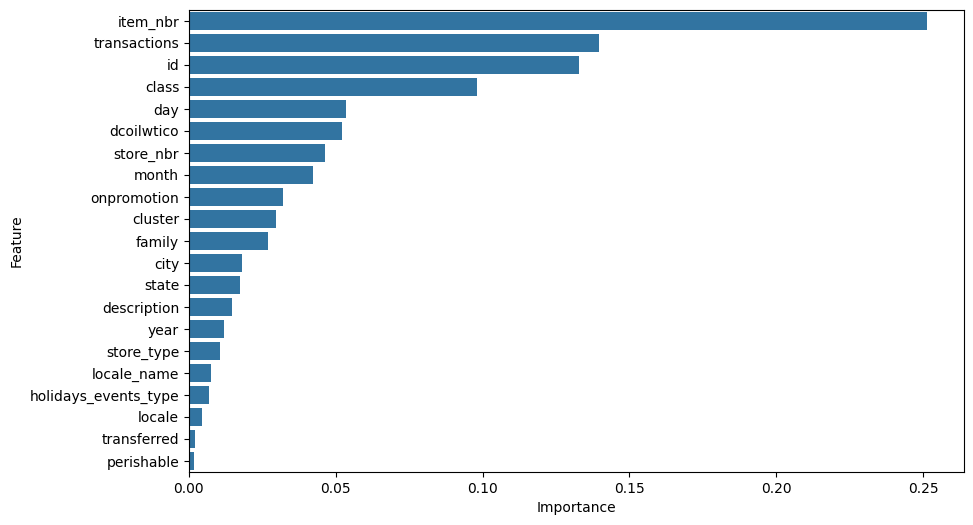

In [8]:
# Prepare features (X) and target variable (y)
X = df.drop(columns=["unit_sales", "date"])  # Features
y = df["unit_sales"]  # Target variable

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Check feature importances
importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
importance.sort_values(by="Importance", ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance)
plt.show()

### Correlation of Data

Visualizing a correlation matrix allows to understand the linear relationships between multiple variables at once.

A heatmap, where each cell in the grid represents the correlation coefficient between two variables, and the color of the cell represents the strength and direction (positive/negative) of this correlation, is then plotted.

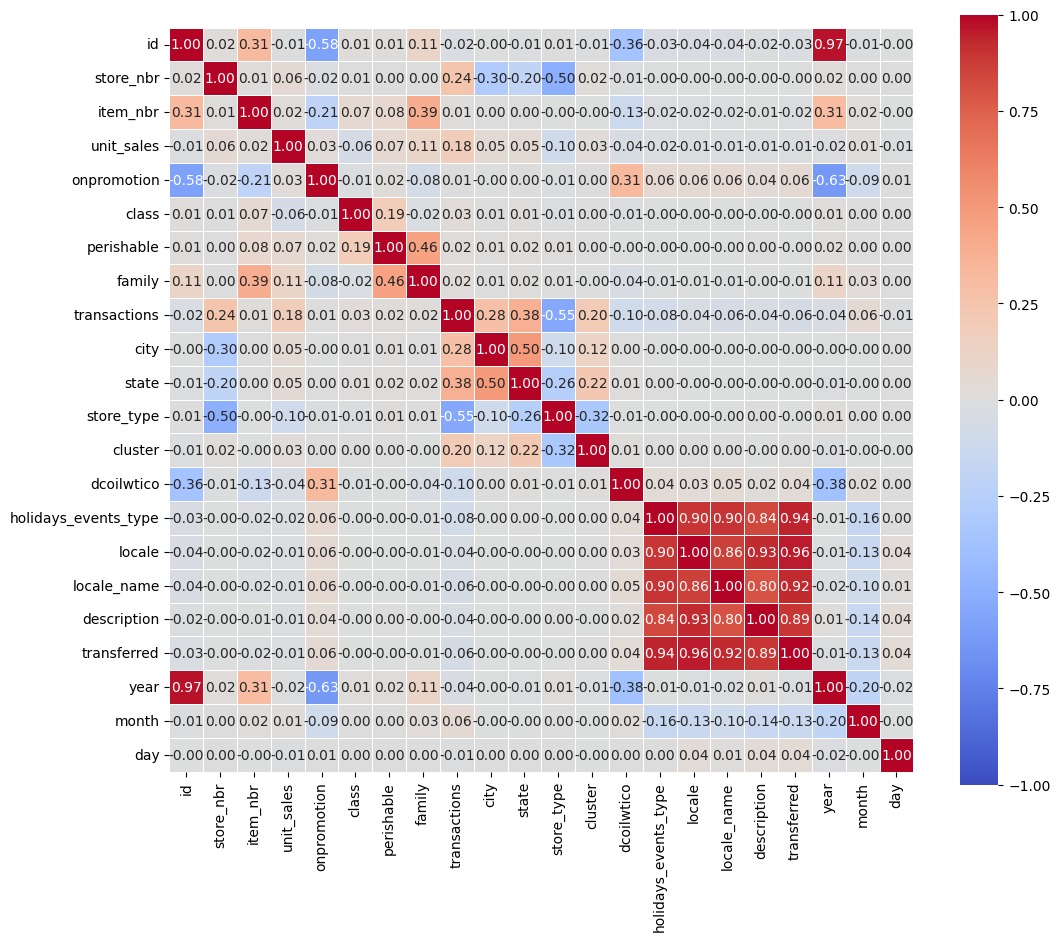

In [9]:
# Check the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.show()

### Distribution of Data

Visualizing a distribution using a histogram allows to understand the underlying frequency distribution of a set of continuous or discrete data. It provides a visual representation of data distribution where each bar corresponds to a range of data values (also known as a bin) and the height of the bar represents the frequency of data points within that range.

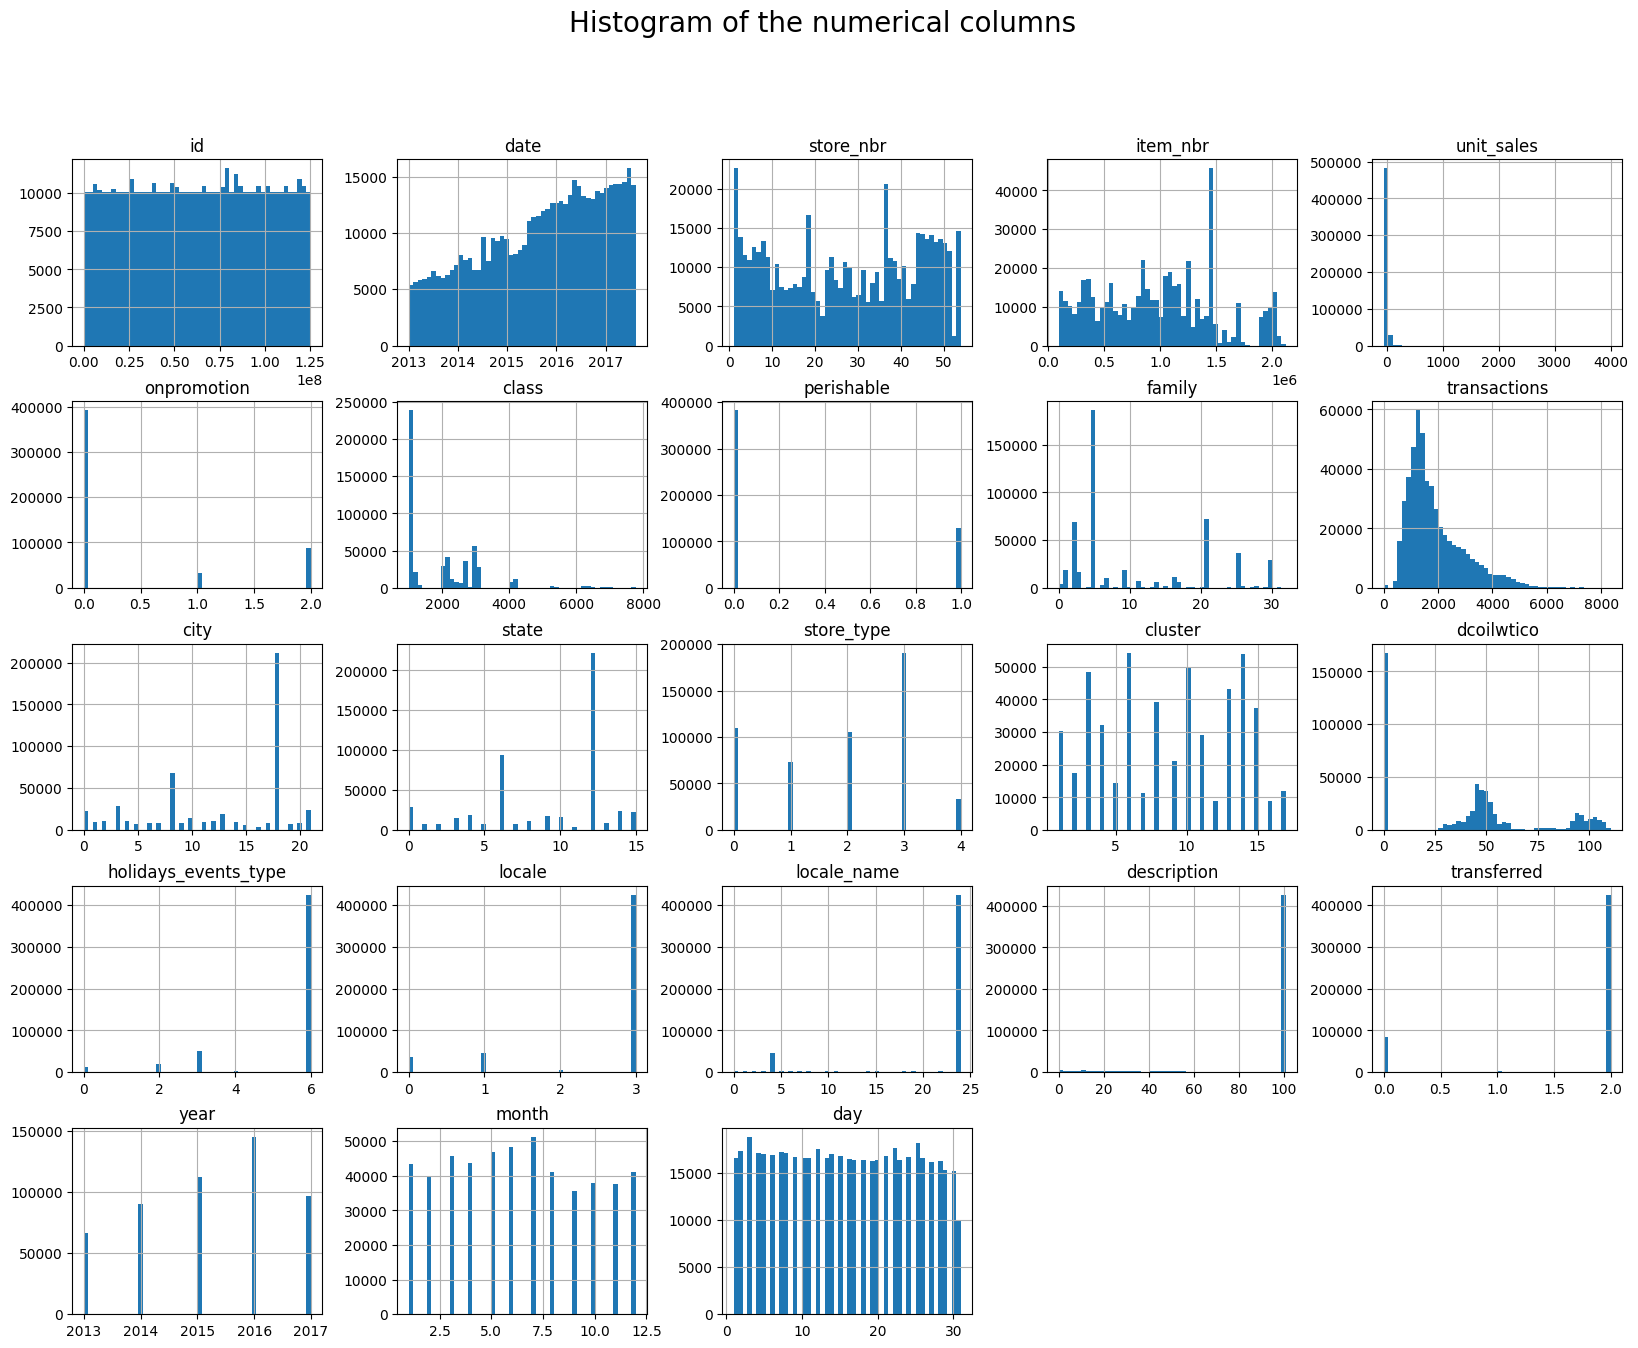

In [10]:
# Check the distribution of the numerical columns
df.hist(bins=50, figsize=(20, 15))

# Plot the histogram
plt.suptitle("Histogram of the numerical columns", fontsize=20)
plt.show()

# Cleaning Data

### Dropping Data

Drops specified columns ("id", "onpromotion", "perishable", "holidays_events_type", "locale", "locale_name", "description", "transferred", "year", "day") from the dataframe `df`.

The "date" column is kept for ARIMA, but will be dropped by Random Forest and Neural Network.

_**Note:** The columns to be dropped was decided based on visualizing the above plots and trial-and-error on training the data to see which yields the better score._

In [11]:
# Drop columns
columns_to_drop = ["id", "onpromotion", "perishable", "holidays_events_type", "locale", "locale_name", "description", "transferred", "year", "day"]
df.drop(columns=columns_to_drop, inplace=True)

# Get the general information and statistical details
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          511881 non-null  datetime64[ns]
 1   store_nbr     511881 non-null  int64         
 2   item_nbr      511881 non-null  int64         
 3   unit_sales    511881 non-null  float64       
 4   class         511881 non-null  int64         
 5   family        511881 non-null  int32         
 6   transactions  511881 non-null  float64       
 7   city          511881 non-null  int32         
 8   state         511881 non-null  int32         
 9   store_type    511881 non-null  int32         
 10  cluster       511881 non-null  int64         
 11  dcoilwtico    511881 non-null  float64       
 12  month         511881 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(4)
memory usage: 41.0 MB


,date,store_nbr,item_nbr,unit_sales,class,family,transactions,city,state,store_type,cluster,dcoilwtico,month
count,511881,511881.000000,5.118810e+05,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.000000,511881.00000
mean,2015-09-17 20:38:05.996941312,27.466554,9.740833e+05,8.564342,1963.665444,10.685077,1881.743882,12.829576,9.179100,1.931474,8.726688,41.287675,6.34930
min,2013-01-01 00:00:00,1.000000,9.699500e+04,-55.000000,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000
25%,2014-09-23 00:00:00,12.000000,5.229410e+05,2.000000,1050.000000,5.000000,1156.000000,8.000000,6.000000,1.000000,4.000000,0.000000,3.00000
50%,2015-11-26 00:00:00,28.000000,9.626000e+05,4.000000,1190.000000,5.000000,1552.000000,17.000000,12.000000,2.000000,9.000000,45.550000,6.00000
75%,2016-10-17 00:00:00,43.000000,1.354383e+06,9.000000,2712.000000,21.000000,2389.000000,18.000000,12.000000,3.000000,13.000000,53.800000,9.00000
max,2017-08-15 00:00:00,54.000000,2.124052e+06,4008.000000,7780.000000,32.000000,8359.000000,21.000000,15.000000,4.000000,17.000000,110.620000,12.00000
std,NaN,16.329811,5.208898e+05,19.339808,1151.915933,9.227275,1044.932331,6.401993,4.127483,1.274090,4.626000,34.805092,3.38031


### Normalizing Data

`StandardScaler` will be used to standardize features by removing the mean and scaling to unit variance.

All columns in the dataframe `df` except "unit_sales" and "date" are normalized as "unit_sales" is the target column and date is not numeric value.

_**Note:** Experimented with StandardScaler and MinMaxScaler. StandardScaler yielded better score._

In [12]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select all columns except 'unit_sales' and 'date'
cols_to_normalize = df.columns.difference(["unit_sales", "date"])

# Normalize these columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Get the general information and statistical details
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511881 entries, 0 to 511880
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          511881 non-null  datetime64[ns]
 1   store_nbr     511881 non-null  float64       
 2   item_nbr      511881 non-null  float64       
 3   unit_sales    511881 non-null  float64       
 4   class         511881 non-null  float64       
 5   family        511881 non-null  float64       
 6   transactions  511881 non-null  float64       
 7   city          511881 non-null  float64       
 8   state         511881 non-null  float64       
 9   store_type    511881 non-null  float64       
 10  cluster       511881 non-null  float64       
 11  dcoilwtico    511881 non-null  float64       
 12  month         511881 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 50.8 MB


,date,store_nbr,item_nbr,unit_sales,class,family,transactions,city,state,store_type,cluster,dcoilwtico,month
count,511881,5.118810e+05,5.118810e+05,511881.000000,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05,5.118810e+05
mean,2015-09-17 20:38:05.996941312,-3.131557e-17,-4.974955e-17,8.564342,-7.716456e-17,3.997732e-18,9.028212e-17,-1.482492e-17,8.261980e-17,1.921132e-17,1.948339e-16,2.385313e-16,-1.647954e-16
min,2013-01-01 00:00:00,-1.620752e+00,-1.683829e+00,-55.000000,-8.348408e-01,-1.157990e+00,-1.800830e+00,-2.003999e+00,-2.223900e+00,-1.515965e+00,-1.670276e+00,-1.186255e+00,-1.582489e+00
25%,2014-09-23 00:00:00,-9.471370e-01,-8.661002e-01,2.000000,-7.931710e-01,-6.161172e-01,-6.945374e-01,-7.543870e-01,-7.702281e-01,-7.310907e-01,-1.021767e+00,-1.186255e+00,-9.908272e-01
50%,2015-11-26 00:00:00,3.266705e-02,-2.204550e-02,4.000000,-6.716343e-01,-6.161172e-01,-3.155651e-01,6.514265e-01,6.834438e-01,5.378409e-02,5.908168e-02,1.224628e-01,-1.033338e-01
75%,2016-10-17 00:00:00,9.512334e-01,7.300971e-01,9.000000,6.496440e-01,1.117874e+00,4.854445e-01,8.076280e-01,6.834438e-01,8.386589e-01,9.237605e-01,3.594973e-01,7.841596e-01
max,2017-08-15 00:00:00,1.624849e+00,2.207703e+00,4008.000000,5.049275e+00,2.309993e+00,6.198739e+00,1.276233e+00,1.410280e+00,1.623534e+00,1.788439e+00,1.992019e+00,1.671653e+00
std,NaN,1.000001e+00,1.000001e+00,19.339808,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00


### Spliting Data

Splits the dataframe `df` into features (`X`) and the target variable (`y`). The features are all columns except "unit_sales", and the target variable is "unit_sales".

The features and the target variable are split into training and testing sets. The test set comprises 20% of the original dataset, and the training set comprises the remaining 80%. The `random_state` is set to 30 to ensure reproducibility.

In [13]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns=["unit_sales"])  # Features
y = df["unit_sales"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### Writing Data

Writes the training and testing datasets (X_train, X_test, y_train, y_test) to CSV files ("X_train.csv", "X_test.csv", "y_train.csv", "y_test.csv"). This allows for easy loading of the data in future sessions.

In [14]:
# Write the split data to csv
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Training Data

### Evaluating Data

The following function takes a machine learning model, training and testing datasets as inputs.

It trains the input model on the training dataset, makes predictions on the test dataset and calculates four evaluation metrics:
- `Mean Squared Error (MSE)`: MSE is a common metric used in regression analysis that measures the average of the squares of the errors or deviations, i.e., the difference between the estimator and what is estimated.
- `Root Mean Squared Error (RMSE)`: RMSE is a standard way to measure the error of a model in predicting quantitative data, calculated as the square root of the average squared differences between the predicted and actual values.
- `Mean Absolute Error (MAE)`: MAE is a measure of errors between paired observations expressing the same phenomenon, specifically the average absolute difference between the actual and predicted values.
- `R-squared (R2) score`: The R2 score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [15]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a machine learning model by training it on the training set and making predictions on the test set.

    Parameters:
    - model: The machine learning model to be evaluated.
    - X_train: The feature matrix of the training set.
    - X_test: The feature matrix of the test set.
    - y_train: The target variable of the training set.
    - y_test: The target variable of the test set.

    Returns:
    None
    """

    if model.__class__.__name__ == "ARIMA":
        # Train the model
        model_fit = model.fit()

        # Make predictions on the test set
        predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

        # Summary of the model
        print(model_fit.summary())

        # Plot residual errors
        residuals = pd.DataFrame(model_fit.resid)
        residuals.plot()
        plt.show()

        # Plot the density of the residuals
        residuals.plot(kind="kde")
        plt.show()

        # Summary stats of residuals
        print(residuals.describe())
    else:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print the evaluation metrics
    print(f"Model : {model.__class__.__name__}")
    print(f"- MSE : {mse}")
    print(f"- RMSE: {rmse}")
    print(f"- MAE : {mae}")
    print(f"- R2  : {r2}")

### Random Forest (RF)

First, loads training and testing data from CSV files, dropping the "date" column from the input data and converting the target data to 1D arrays.

Next, initializes a Random Forest Regressor model with a random state of 30 for reproducibility.

Last, calls the function `evaluate_model()` to train the model on the training data and evaluate its performance on the testing data.

In [16]:
# Load the split data from csv
X_train = pd.read_csv("X_train.csv").drop(columns=["date"])
X_test = pd.read_csv("X_test.csv").drop(columns=["date"])
y_train = np.ravel(pd.read_csv("y_train.csv"))
y_test = np.ravel(pd.read_csv("y_test.csv"))

# Initialize the model
model = RandomForestRegressor(random_state=30, verbose=1)

# Evaluate the model
evaluate_model(model, X_train, X_test, y_train, y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


Model : RandomForestRegressor
- MSE : 249.9970399757387
- RMSE: 15.811294696378873
- MAE : 5.2978226883740165
- R2  : 0.3281432891310395


### Autoregressive Integrated Moving Average (ARIMA)

First, loads training and testing data from CSV files. Then:
1. The features (X) and the target variable (y) are combined into single DataFrames train and test by concatenating them along the columns axis. This step is necessary to ensure that the features and target variable are aligned before further processing.
2. The "date" column in both train and test DataFrames is converted to datetime format to ensure that it is treated as a datetime object. Then, the "date" column is set as the index of both DataFrames.
3. The index of both train and test DataFrames is converted to periods with a daily frequency. This step ensures that the time series data is represented in a uniform time period format.
4. Both train and test DataFrames are sorted by the index. Sorting the data ensures that the time series data is ordered chronologically, which is a requirement for time series modeling.
5. Finally, the dataset is split into features (X) and the target variable (y) for both training and testing sets.

Next, initializes an ARIMA model with order (5, 1, 0).

Last, calls the function `evaluate_model()` to fit the model to the training data and evaluate its performance on the testing data.

                               SARIMAX Results                                
Dep. Variable:             unit_sales   No. Observations:               409504
Model:                 ARIMA(5, 1, 0)   Log Likelihood            -1824995.174
Date:                Sat, 09 Mar 2024   AIC                        3650002.347
Time:                        12:13:12   BIC                        3650067.884
Sample:                    01-01-2013   HQIC                       3650021.055
                         - 08-15-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8322      0.000  -5800.092      0.000      -0.833      -0.832
ar.L2         -0.6660      0.000  -3703.930      0.000      -0.666      -0.666
ar.L3         -0.4975      0.000  -2615.732      0.0

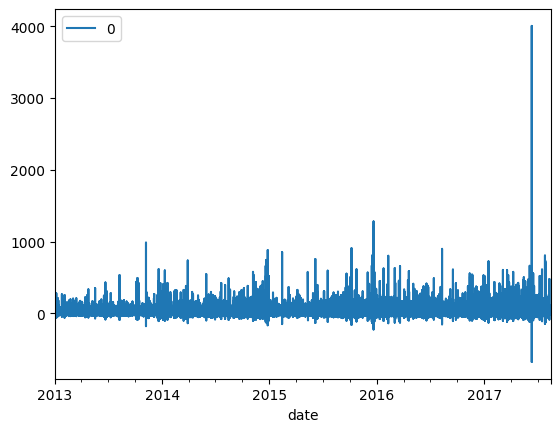

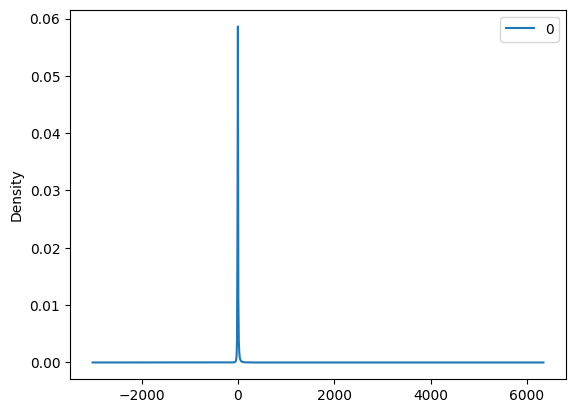

                   0
count  409504.000000
mean       -0.000049
std        20.856622
min      -677.643189
25%        -5.867558
50%        -2.255745
75%         2.169969
max      4005.004187
Model : ARIMA
- MSE : 410.664876875353
- RMSE: 20.264868044854204
- MAE : 6.825402607322932
- R2  : -0.10364488105002034


In [17]:
# Load the split data from csv
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# combine X and y into a single dataframe
train = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
test = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)

# Convert date column to datetime and set it as the index
train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])
train.set_index("date", inplace=True)
test.set_index("date", inplace=True)
train.index = pd.DatetimeIndex(train.index).to_period("D")
test.index = pd.DatetimeIndex(test.index).to_period("D")
train = train.sort_index()
test = test.sort_index()

# Split the dataset into features (X) and the target variable (y)
X_train = train.drop(columns=["unit_sales"])
X_test = test.drop(columns=["unit_sales"])
y_train = train["unit_sales"]
y_test = test["unit_sales"]

# Initialize the model
model = ARIMA(y_train, order=(5, 1, 0))

# Evaluate the model
evaluate_model(model, X_train, X_test, y_train, y_test)

### Neural Network (NN)

First, loads training and testing data from CSV files, dropping the "date" column from the input data and converting the target data to 1D arrays.

Next, initializes a Sequential model with input and hidden layers with 'relu' activation and output layer with 'linear' activation.
Compiles the model with 'mean_squared_error' as the loss function and 'adam' as the optimizer.
Wraps the model in a KerasRegressor, setting the number of epochs to 25 and the batch size to 10.

Last, calls the function `evaluate_model()` to train the model on the training data and evaluate its performance on the testing data.

In [18]:
# Load the split data from csv
X_train = pd.read_csv("X_train.csv").drop(columns=["date"])
X_test = pd.read_csv("X_test.csv").drop(columns=["date"])
y_train = np.ravel(pd.read_csv("y_train.csv"))
y_test = np.ravel(pd.read_csv("y_test.csv"))

# Create the Sequential model
model = Sequential()
model.add(Dense(11, input_dim=11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="RMSprop")

# Create a regressor with the model
regressor = KerasRegressor(build_fn=lambda: model, epochs=25, batch_size=10, verbose=1)

# Evaluate the model
evaluate_model(regressor, X_train, X_test, y_train, y_test)

Epoch 1/25


C:\Users\Arjun\AppData\Local\Temp\ipykernel_11640\3812732645.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=lambda: model, epochs=25, batch_size=10, verbose=1)


40951/40951 [==============================] - 17s 419us/step - loss: 356.5203
Epoch 2/25
40951/40951 [==============================] - 17s 413us/step - loss: 354.3354
Epoch 3/25
40951/40951 [==============================] - 17s 404us/step - loss: 353.7435
Epoch 4/25
40951/40951 [==============================] - 17s 405us/step - loss: 354.1456
Epoch 5/25
40951/40951 [==============================] - 16s 399us/step - loss: 354.6096
Epoch 6/25
40951/40951 [==============================] - 15s 370us/step - loss: 354.2532
Epoch 7/25
40951/40951 [==============================] - 16s 389us/step - loss: 354.7582
Epoch 8/25
40951/40951 [==============================] - 15s 372us/step - loss: 354.2629
Epoch 9/25
40951/40951 [==============================] - 16s 385us/step - loss: 354.1214
Epoch 10/25
40951/40951 [==============================] - 16s 384us/step - loss: 354.6386
Epoch 11/25
40951/40951 [==============================] - 16s 385us/step - loss: 354.4910
Epoch 12/25
40951/4